In [78]:
import numpy as np
from Helpers import helpers

def validate_q (u, r_max, epsilon, n_dimensions=2):
    q = u / r_max
    print( n_dimensions* np.exp(epsilon * u), q)
    if r_max < u: 
        print("holds for r_max")
    else:
        print("does not hold for r_max")

    if q > n_dimensions * np.exp(epsilon * u):
        print("The inequality holds.")
    else:
        print("The inequality does not hold.")
        
def compute_diameter(data):
    """
    Compute the diameter of the dataset using Euclidean distance.
    
    Parameters:
    - data: A 2D numpy array where each row is a data point and each column is a feature.
    
    Returns:
    - diameter: The maximum Euclidean distance between any two points in the dataset.
    """
    if not isinstance(data, np.ndarray):
        raise ValueError("Input data must be a numpy array")
    
    max_distance = 0
    for i in range(data.shape[0]):
        for j in range(i+1, data.shape[0]):
            distance = np.linalg.norm(data[i] - data[j])
            max_distance = max(max_distance, distance)
    return max_distance

In [105]:
from sklearn.preprocessing import MinMaxScaler

data = helpers.load_dataset('../data/heart-dataset/heart_numerical.csv')
n_dimensions = 9
# find diameter of the dataset with custom function (does not exist)
test_normization = MinMaxScaler().fit_transform(X=data.iloc[:, :n_dimensions])
dia = compute_diameter(test_normization)
print(dia)

1.8922954828929255


In [120]:
u = dia + 20
r_max = dia

epsilon = 0.1

validate_q(u, r_max, epsilon, n_dimensions=n_dimensions)

80.35498454166647 11.569173884738216
holds for r_max
The inequality does not hold.


In [15]:
from Helpers import twod_laplace

twod_laplace.LambertW(0.99)

-1.5442425994626316

In [5]:
0.99 > -1/np.e

True

In [6]:
from scipy.special import lambertw

lambertw(0.99, k=-1).real


-1.5442425994626316

/var/folders/x3/k4hl686x0jb6bj0ky2fbhwlw0000gn/T/ipykernel_6775/529453449.py:7: RuntimeWarning: invalid value encountered in log
  return (1/u) * np.log((q + 2 * np.exp(epsilon * u)) / (q - 2 * np.exp(epsilon * u)))


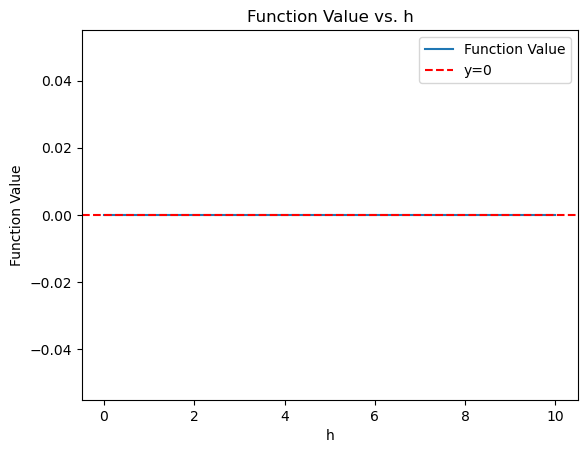

In [197]:
import numpy as np
import matplotlib.pyplot as plt

def evaluate_function(R_m, epsilon, h):
    u = R_m / h
    q = np.exp(epsilon * u)
    return (1/u) * np.log((q + 2 * np.exp(epsilon * u)) / (q - 2 * np.exp(epsilon * u)))

# Parameters
R_m = 5.0
epsilon = 0.5
h_values = np.linspace(0.01, 10.0, 1000)
y_values = [evaluate_function(R_m, epsilon, h) for h in h_values]

# Filter out extreme values
y_values = [y if np.abs(y) < 1e10 else 0 for y in y_values]

# Plot
plt.plot(h_values, y_values, label='Function Value')
plt.axhline(0, color='red', linestyle='--', label='y=0')
plt.xlabel('h')
plt.ylabel('Function Value')
plt.legend()
plt.title('Function Value vs. h')
plt.show()
